In [9]:
library(RPostgreSQL)

drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv, dbname = "mimic",
                 host = "localhost", port = 5432,
                 user = "datathon", password = "datathon")

In [10]:
dbListTables(con)

[1] "chartevents_12"      "d_icd_diagnoses"     "d_labitems"         
 [4] "procedureevents_mv"  "procedures_icd"      "ventdurations"      
 [7] "crrtdurations"       "admissions"          "callout"            
[10] "caregivers"          "chartevents"         "chartevents_1"      
[13] "chartevents_10"      "chartevents_11"      "chartevents_13"     
[16] "chartevents_14"      "chartevents_2"       "chartevents_3"      
[19] "chartevents_4"       "chartevents_5"       "chartevents_6"      
[22] "chartevents_7"       "chartevents_8"       "chartevents_9"      
[25] "cptevents"           "d_cpt"               "d_icd_procedures"   
[28] "d_items"             "datetimeevents"      "diagnoses_icd"      
[31] "drgcodes"            "icustays"            "inputevents_cv"     
[34] "inputevents_mv"      "labevents"           "microbiologyevents" 
[37] "noteevents"          "outputevents"        "patients"           
[40] "prescriptions"       "services"            "transfers"          
[43] "ccs_single_level_dx" "ccs_multi_level_dx"

In [44]:
dbGetQuery(con, "/dmv")

Warning message in postgresqlQuickSQL(conn, statement, ...):
“Could not create execute/dmv”

NULL

In [41]:
vent = dbGetQuery(con, "select * from ventdurations where icustay_id < 200100")
head(vent)

icustay_id,ventnum,starttime,endtime,duration_hours
200003,1,2199-08-03 18:00:00,2199-08-07 13:00:00,91.00000
200006,1,2159-09-03 13:00:00,2159-09-04 03:50:00,14.83333
200009,1,2189-11-30 18:10:00,2189-12-01 10:00:00,15.83333
200011,1,2188-08-06 01:00:00,2188-08-06 04:00:00,3.00000
200014,1,2105-02-16 23:15:00,2105-02-17 18:00:00,18.75000
200017,1,2138-03-17 22:00:00,2138-03-21 09:00:00,83.00000


In [53]:
intubated = dbGetQuery(con, "select intubated from oxy_params")
head(intubated)

intubated
NA
NA
NA
NA
NA
NA


In [77]:
PFpeep = dbGetQuery(con, "select * from pao2fio2peep")
write.csv(PFpeep,"/Data/common/for_kiesha/PF.csv")
head(PFpeep,50)

icustay_id,charttime,specimen_pred,pao2fio2,peep
200001,2181-11-25 19:27:00,ART,NA,NA
200001,2181-11-26 11:07:00,ART,NA,NA
200001,2181-11-26 17:44:00,ART,NA,NA
200001,2181-11-26 18:56:00,ART,NA,NA
200001,2181-11-27 01:26:00,ART,NA,NA
200001,2181-11-27 12:24:00,ART,NA,NA
200001,2181-11-28 12:45:00,ART,NA,NA
200003,2199-08-03 01:55:00,ART,88.0000,NA
200003,2199-08-03 03:42:00,ART,94.0000,NA
200003,2199-08-03 10:49:00,ART,216.0000,NA


In [60]:
elixhauser = dbGetQuery(con, "select * from elixhauser_ahrq")
head(elixhauser)
dim(elixhauser)
write.csv(elixhauser,"/Data/common/for_kiesha/elixhauser.csv",row.names=FALSE)

subject_id,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,⋯,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
58526,100001,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
54610,100003,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9895,100006,0,1,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,1
23018,100007,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
533,100009,0,0,0,0,1,0,0,0,⋯,0,1,0,0,0,1,0,0,0,0
55853,100010,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0


[1] 58976    32

In [25]:
###To see all the 
dbListTables(con)

[1] "chartevents_12"      "d_icd_diagnoses"     "d_labitems"         
 [4] "procedureevents_mv"  "procedures_icd"      "ventdurations"      
 [7] "crrtdurations"       "admissions"          "callout"            
[10] "caregivers"          "chartevents"         "chartevents_1"      
[13] "chartevents_10"      "chartevents_11"      "chartevents_13"     
[16] "chartevents_14"      "chartevents_2"       "chartevents_3"      
[19] "chartevents_4"       "chartevents_5"       "chartevents_6"      
[22] "chartevents_7"       "chartevents_8"       "chartevents_9"      
[25] "cptevents"           "d_cpt"               "d_icd_procedures"   
[28] "d_items"             "datetimeevents"      "diagnoses_icd"      
[31] "drgcodes"            "icustays"            "inputevents_cv"     
[34] "inputevents_mv"      "labevents"           "microbiologyevents" 
[37] "noteevents"          "outputevents"        "patients"           
[40] "prescriptions"       "services"            "transfers"          
[43] "ccs_single_level_dx" "ccs_multi_level_dx"

In [47]:
library(tidyverse)
install.packages("dbplyr")
library(dbplyr)
chartevents_12 <- tbl(con, "mpwr_chartevents_vent")
head(chartevents_12)

Installing package into ‘/home/team12user3/R/library’
(as ‘lib’ is unspecified)


# Source:   lazy query [?? x 7]
# Database: postgres 9.5.7 [datathon@localhost:5432/mimic]
   icustay_id           charttime itemid value valuenum valueuom
        <int>              <dttm>  <int> <chr>    <dbl>    <chr>
 1     275017 2152-11-21 09:30:00    618    24       24      BPM
 2     275017 2152-11-21 20:00:00    618    23       23      BPM
 3     292368 2200-09-08 12:00:00    618    10       10      BPM
 4     292368 2200-09-08 13:00:00    618    15       15      BPM
 5     292368 2200-09-09 11:00:00    618     7        7      BPM
 6     292368 2200-09-09 12:00:00    618    19       19      BPM
 7     260977 2167-10-25 21:00:00    618    15       15      BPM
 8     260977 2167-10-26 20:00:00    618    15       15      BPM
 9     260977 2167-10-26 21:00:00    618    15       15      BPM
10     292368 2200-09-14 19:00:00    618    16       16      BPM
# ... with more rows, and 1 more variables: storetime <dttm>

In [36]:
tableNamesDF = lapply(dbListTables(con),
                      function(tablename) {
                          data.frame(tblName = tablename, col = colnames(tbl(con, tablename))) }) %>% do.call(rbind,.)
                                            

In [33]:
tableNamesDF

tblName,col
chartevents_12,row_id
chartevents_12,subject_id
chartevents_12,hadm_id
chartevents_12,icustay_id
chartevents_12,itemid
chartevents_12,charttime
chartevents_12,storetime
chartevents_12,cgid
chartevents_12,value
chartevents_12,valuenum


In [76]:
###Read in the raw tables
test<-read.csv("/Data/common/for_kiesha/Ventilator_final_table_demo_mort_vent.csv")
#head(test)
colnames(test)

test2<-read.table("/Data/common/for_kiesha/Ventilator_demo.tsv",sep="\t",header=TRUE)
head(test2)
colnames(test2)

[1] "icustay_id"           "age"                  "subject_id"          
 [4] "hadm_id"              "admission_type"       "admittime"           
 [7] "dischtime"            "first_hosp_stay"      "first_icu_stay"      
[10] "hospital_expire_flag" "hospstay_seq"         "icustay_seq"         
[13] "intime"               "los_hospital"         "los_icu"             
[16] "outtime"              "apsiii"               "apsiii_prob"         
[19] "oasis"                "oasis_prob"           "icu_mort"            
[22] "h_mort"               "one_mort"             "thr_mort"            
[25] "six_mort"             "tv_set"               "gender"              
[28] "ethnicity"            "height"               "pbw"                 
[31] "tv_pbw"               "tv_pbw_observed"

icustay_id,gender,age,height,subject_id,hadm_id,admission_type,admittime,dischtime,ethnicity,first_hosp_stay,first_icu_stay,hospital_expire_flag,hospstay_seq,icustay_seq,intime,los_hospital,los_icu,outtime
294912,M,57.0272,178.00,72530,189421,EMERGENCY,2170-07-11 17:28:00,2170-07-30 16:33:00,WHITE,Y,Y,0,1,1,2170-07-16 10:14:57,18.9618,1.1795,2170-07-17 14:33:28
262146,F,77.9385,157.48,14114,189388,ELECTIVE,2141-04-25 10:00:00,2141-05-04 17:00:00,WHITE,N,Y,0,2,1,2141-04-25 12:41:07,9.2917,2.0080,2141-04-27 12:52:34
229381,F,42.2699,165.10,47927,161682,EMERGENCY,2108-12-23 17:42:00,2108-12-27 19:00:00,UNKNOWN/NOT SPECIFIED,Y,Y,1,1,1,2108-12-23 17:43:08,4.0542,4.1369,2108-12-27 21:00:12
294919,M,70.8541,172.72,86078,182281,EMERGENCY,2183-02-03 21:02:00,2183-02-08 15:00:00,WHITE,Y,Y,1,1,1,2183-02-03 21:03:22,4.7486,4.8489,2183-02-08 17:25:51
262154,F,300.0023,157.00,94698,152925,EMERGENCY,2105-12-07 10:37:00,2105-12-26 15:30:00,WHITE,Y,Y,0,1,1,2105-12-07 10:37:54,19.2035,12.3319,2105-12-19 18:35:54
229387,M,68.0426,170.18,6561,142014,EMERGENCY,2149-12-17 00:32:00,2150-01-03 14:00:00,WHITE,Y,Y,0,1,1,2149-12-17 13:01:58,17.5611,8.9507,2149-12-26 11:51:02


[1] "icustay_id"           "gender"               "age"                 
 [4] "height"               "subject_id"           "hadm_id"             
 [7] "admission_type"       "admittime"            "dischtime"           
[10] "ethnicity"            "first_hosp_stay"      "first_icu_stay"      
[13] "hospital_expire_flag" "hospstay_seq"         "icustay_seq"         
[16] "intime"               "los_hospital"         "los_icu"             
[19] "outtime"

In [170]:
#read in compiled tables
compiledTable<-read.csv("/Data/common/survival_1.csv")
#head(compiledTable)
colnames(compiledTable)
head(compiledTable)

[1] "icustay_id"               "age"                     
  [3] "subject_id"               "hadm_id"                 
  [5] "admission_type"           "admittime"               
  [7] "dischtime"                "first_hosp_stay"         
  [9] "first_icu_stay"           "hospital_expire_flag"    
 [11] "hospstay_seq"             "icustay_seq"             
 [13] "intime.x"                 "los_hospital"            
 [15] "los_icu"                  "outtime"                 
 [17] "apsiii"                   "apsiii_prob"             
 [19] "oasis"                    "oasis_prob"              
 [21] "icu_mort"                 "h_mort"                  
 [23] "one_mort"                 "thr_mort"                
 [25] "six_mort"                 "tv_set"                  
 [27] "gender"                   "ethnicity"               
 [29] "height"                   "pbw"                     
 [31] "tv_pbw"                   "tv_pbw_observed"         
 [33] "tv_cat"                   "intime.y"                
 [35] "deathtime"                "time_till_death"         
 [37] "tmins"                    "tdays"                   
 [39] "mean_tv_observed"         "tv_pbw_mean"             
 [41] "chosen"                   "congestive_heart_failure"
 [43] "cardiac_arrhythmias"      "valvular_disease"        
 [45] "pulmonary_circulation"    "peripheral_vascular"     
 [47] "hypertension"             "paralysis"               
 [49] "other_neurological"       "chronic_pulmonary"       
 [51] "diabetes_uncomplicated"   "diabetes_complicated"    
 [53] "hypothyroidism"           "renal_failure"           
 [55] "liver_disease"            "peptic_ulcer"            
 [57] "aids"                     "lymphoma"                
 [59] "metastatic_cancer"        "solid_tumor"             
 [61] "rheumatoid_arthritis"     "coagulopathy"            
 [63] "obesity"                  "weight_loss"             
 [65] "fluid_electrolyte"        "blood_loss_anemia"       
 [67] "deficiency_anemias"       "alcohol_abuse"           
 [69] "drug_abuse"               "psychoses"               
 [71] "depression"               "hours_vent"              
 [73] "PC1"                      "PC2"                     
 [75] "PC3"                      "PC4"                     
 [77] "PC5"                      "PC6"                     
 [79] "PC7"                      "PC8"                     
 [81] "PC9"                      "PC10"                    
 [83] "PC11"                     "PC12"                    
 [85] "PC13"                     "PC14"                    
 [87] "PC15"                     "PC16"                    
 [89] "PC17"                     "PC18"                    
 [91] "PC19"                     "PC20"                    
 [93] "PC21"                     "PC22"                    
 [95] "PC23"                     "PC24"                    
 [97] "PC25"                     "PC26"                    
 [99] "PC27"                     "PC28"                    
[101] "PC29"                     "PC30"                    
[103] "pao2fio2_mean"            "peep_mean"               
[105] "pao2fio2_max"             "peep_max"                
[107] "pao2fio2_sd"              "peep_sd"

icustay_id,age,subject_id,hadm_id,admission_type,admittime,dischtime,first_hosp_stay,first_icu_stay,hospital_expire_flag,⋯,PC27,PC28,PC29,PC30,pao2fio2_mean,peep_mean,pao2fio2_max,peep_max,pao2fio2_sd,peep_sd
200191,62.4176,76012,191578,EMERGENCY,2160-11-18 12:26:00,2160-12-03 18:53:00,Y,Y,0,⋯,NA,NA,NA,NA,254.8810,5.000000,72.67983,0.000000,72.67983,0.000000
200290,59.6253,76420,160159,URGENT,2102-12-24 15:52:00,2103-01-12 14:50:00,Y,Y,0,⋯,NA,NA,NA,NA,178.8568,12.482759,80.25355,3.841695,80.25355,3.841695
200325,53.0687,82257,161851,EMERGENCY,2142-06-01 22:21:00,2142-08-10 15:00:00,Y,Y,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
200489,68.7234,64819,159799,EMERGENCY,2156-06-09 15:49:00,2156-06-17 15:20:00,Y,Y,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
200694,59.9734,59347,144152,URGENT,2145-01-16 18:59:00,2145-02-24 13:21:00,Y,Y,0,⋯,NA,NA,NA,NA,253.2088,9.875000,66.93859,2.531939,66.93859,2.531939
201077,25.9579,57764,103584,EMERGENCY,2126-02-01 21:56:00,2126-05-14 10:23:00,Y,Y,0,⋯,0.02484009,0.0009104123,-0.01533627,0.001039624,408.9708,5.436667,213.08508,1.267766,213.08508,1.267766


In [126]:
dim(elixhauser)
oldelix<-colnames(elixhauser)
dim(oldelix)
newElix<-compiledTable[colnames(compiledTable) %in% oldelix]
dim(newElix)
head(newElix)

#head(elixhauser[!which(elixhauser$subject_id %in% unique(elixhauser$subject_id)),]

#table()
#head(t(elixhauser[,c(3:32)]))

[1] 58976    32

NULL

[1] 1105   32

subject_id,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,⋯,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
76012,191578,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
76420,160159,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,1,0,0,0,0
82257,161851,0,1,0,0,0,0,1,0,⋯,0,0,1,0,0,0,0,0,0,0
64819,159799,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,1
59347,144152,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
57764,103584,0,0,0,0,0,0,0,0,⋯,1,0,0,1,0,0,0,0,0,0


[1] 1105   30

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
76012,-0.7546715,-0.3450593,-0.1272577,0.33664153,0.06063483,-0.0001582318,0.13936810,0.09175189,0.00795296,0.01627775,⋯,-0.026816612,0.11062118,-0.05330906,-0.056474474,0.02397190,0.001200581,0.067853457,-0.002804179,0.0001194167,-2.880955e-05
76420,-0.1461770,0.3830158,-0.2769528,0.03788286,0.85934306,-0.1812769065,-0.17720158,-0.16336980,-0.09002984,0.18941262,⋯,0.034563862,0.02771447,-0.04680938,-0.017655779,0.06303260,0.005164864,-0.009358332,0.028032812,0.0010988817,2.567680e-03
82257,-0.4799071,-0.3893508,0.3724571,0.58936315,0.04454862,0.4544810718,0.51791000,0.09344255,0.78502194,0.17566731,⋯,0.143670136,-0.02691351,-0.01207339,-0.157162472,-0.02853014,0.071270315,0.072534973,0.014498476,-0.0026735616,-5.760904e-03
64819,0.2020114,-0.9344380,-0.8551369,0.37509141,-0.22336915,-0.0560868999,-0.24114154,0.24367768,-0.24238877,0.04735995,⋯,0.224539295,-0.01669482,-0.07165049,-0.069847660,0.02198490,0.055723445,0.021166000,0.046088783,-0.0018571391,3.501203e-04
59347,-0.7430822,-0.4564497,-0.1130411,-0.03760325,-0.05324474,-0.1552251865,0.02669934,0.17145615,-0.43274673,0.25029235,⋯,0.094835517,0.06612501,-0.07386802,0.016667577,0.02466690,0.006982244,-0.000718805,0.021201782,0.0002299196,6.619304e-04
57764,-0.2229296,0.7660169,-0.2454379,0.24607997,-0.30644693,0.0946961477,0.15347141,-0.15499052,-0.36272428,-0.18387714,⋯,0.005658695,0.04692203,-0.06021299,-0.003248879,0.05079821,0.012240739,0.015588938,0.014190129,0.0002711778,2.077167e-03


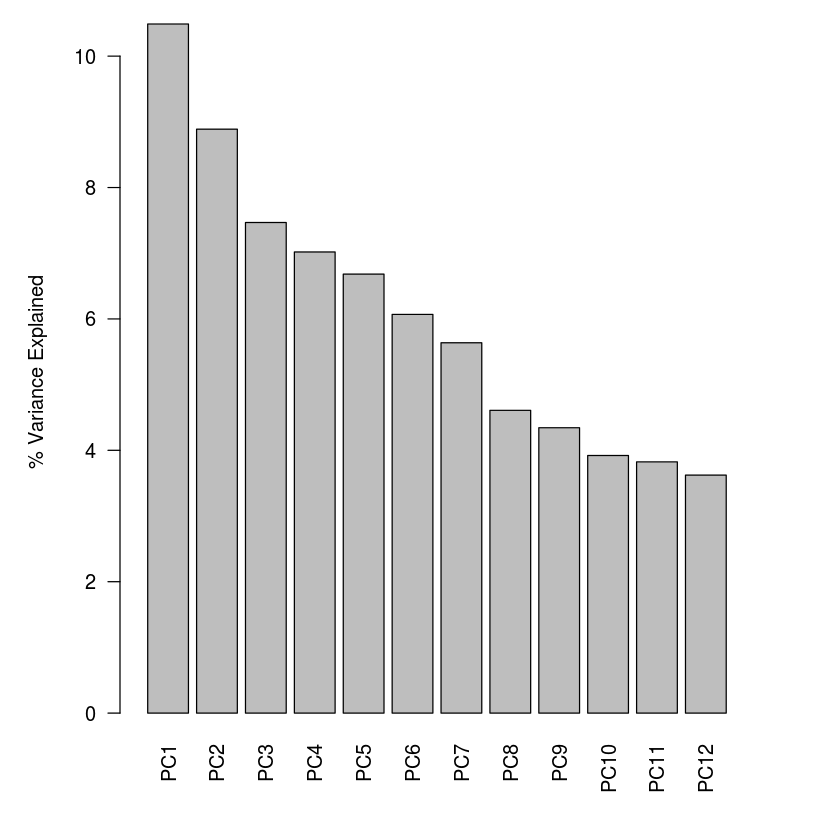

In [142]:

pcaElix<-prcomp(newElix[,c(3:32)])
dim(pcaElix$x)
pca<-pcaElix$x
row.names(pca)<-newElix$subject_id
head(pca)
write.csv(pca,"/Data/common/for_kiesha/elixhauser_PCAv2.csv")

#PLOT VARIANCE OF PCA
 
p.variance.explained = pcaElix$sdev^2 / sum(pcaElix$sdev^2)
write.csv(p.variance.explained,"/Data/common/for_kiesha/elixhauser_PCA_perctVar.csv")
 # plot percentage of variance explained for each principal component    
  dat<-1:12
  forplot<-p.variance.explained[dat]
  names(forplot)<-c(paste("PC",c(1:12),sep=""))
  par(mar=c(5, 5, 1, 8))
  barplot(100*forplot, las=2, xlab="", ylab='% Variance Explained',xlim = c(0,12))
  

In [134]:
pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
76012,-0.75467150,-0.345059332,-0.12725775,0.336641532,0.060634832,-0.0001582318,0.13936810,0.09175189,0.007952960,0.016277749,⋯,-0.026816612,0.11062118,-5.330906e-02,-0.0564744741,0.023971901,0.001200581,0.067853457,-0.002804179,0.0001194167,-2.880955e-05
76420,-0.14617704,0.383015826,-0.27695283,0.037882859,0.859343065,-0.1812769065,-0.17720158,-0.16336980,-0.090029844,0.189412622,⋯,0.034563862,0.02771447,-4.680938e-02,-0.0176557793,0.063032603,0.005164864,-0.009358332,0.028032812,0.0010988817,2.567680e-03
82257,-0.47990714,-0.389350806,0.37245714,0.589363145,0.044548624,0.4544810718,0.51791000,0.09344255,0.785021943,0.175667306,⋯,0.143670136,-0.02691351,-1.207339e-02,-0.1571624718,-0.028530144,0.071270315,0.072534973,0.014498476,-0.0026735616,-5.760904e-03
64819,0.20201135,-0.934437993,-0.85513686,0.375091415,-0.223369155,-0.0560868999,-0.24114154,0.24367768,-0.242388767,0.047359951,⋯,0.224539295,-0.01669482,-7.165049e-02,-0.0698476597,0.021984895,0.055723445,0.021166000,0.046088783,-0.0018571391,3.501203e-04
59347,-0.74308222,-0.456449668,-0.11304109,-0.037603249,-0.053244739,-0.1552251865,0.02669934,0.17145615,-0.432746730,0.250292350,⋯,0.094835517,0.06612501,-7.386802e-02,0.0166675775,0.024666901,0.006982244,-0.000718805,0.021201782,0.0002299196,6.619304e-04
57764,-0.22292956,0.766016915,-0.24543786,0.246079972,-0.306446925,0.0946961477,0.15347141,-0.15499052,-0.362724283,-0.183877135,⋯,0.005658695,0.04692203,-6.021299e-02,-0.0032488793,0.050798209,0.012240739,0.015588938,0.014190129,0.0002711778,2.077167e-03
49379,-0.46005932,-0.377225458,-0.31956868,-0.788800092,0.570582127,-0.2936636790,0.40782080,-0.31577774,0.169815021,0.206443124,⋯,-0.073181716,0.02334148,-3.909654e-03,-0.0004122603,0.065054640,-0.022571768,0.001757148,0.014804600,0.0022133854,-4.207415e-04
56697,-0.74008434,-0.536238351,-0.17298561,-0.591844765,-0.058663423,0.2433554091,0.25015000,-0.21377315,-0.066579573,-0.011160250,⋯,-0.092679259,0.04445648,-1.335323e-05,0.0109317679,0.040435575,-0.025982076,0.023858474,0.009741427,-0.0005161375,5.783024e-04
86199,0.72012036,-0.751991118,0.25259533,0.296196516,0.736930114,-0.3901961329,0.61721856,0.29737843,-0.182095670,0.354627536,⋯,0.358620801,0.07413503,-1.300908e-01,-0.1374719110,-0.928152331,-0.618519021,0.152258615,0.074528602,-0.0025704297,-2.696879e-03
70304,0.21993550,0.678375362,0.37956447,0.697390454,-0.428295517,0.4909653824,0.46028146,-0.30796850,0.278539569,0.327624093,⋯,-0.565006459,-0.20145260,-1.392049e-01,-0.0638035235,-0.014393263,0.041512135,-0.015862461,-0.023224886,-0.0042164149,9.969866e-03


In [95]:
row.names(pcaElix$x)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [65]:
install.packages("survival")
library("survival")

Installing package into ‘/home/team12user3/R/library’
(as ‘lib’ is unspecified)


In [63]:
coxph(Surv(tday, h_mort) ~ chosen+gender+ethnicity+pao2fio2+oasis+elixhauser+hoursVent, data = DF)

In [ ]:
#calculate the summary stats


In [ ]:
###To disconnect
dbDisconnect(con)
dbUnloadDriver(drv)

In [143]:
tab1_conti = function(DATA,SIGFIG=1)
{
 meand = mean(DATA, na.rm=TRUE)
 sdd = sd(DATA, na.rm=TRUE)
 results = paste0(round(meand,SIGFIG),' (', round(sdd,SIGFIG),')')
 return(results)
}



In [152]:
#tab1_conti(df$age[df$chosen==2], 1)
df=compiledTable
tab1_conti(df$apsiii, 1)
tab1_conti(df$apsiii[df$chosen==1], 1)
tab1_conti(df$apsiii[df$chosen==2], 1)
tab1_conti(df$apsiii[df$chosen==3], 1)
tab1_conti(df$apsiii[df$chosen==4], 1)




#icustay_id' 'age' 'subject_id' 'hadm_id' 'admission_type' 'admittime' 'dischtime' 'first_hosp_stay' 'first_icu_stay' 'hospital_expire_flag' 'hospstay_seq' 'icustay_seq' 'intime.x' 'los_hospital' 'los_icu' 'outtime' 'apsiii' 'apsiii_prob' 'oasis' 'oasis_prob' 'icu_mort' 'h_mort' 'one_mort' 'thr_mort' 'six_mort' 'tv_set' 'gender' 'ethnicity' 'height' 'pbw' 'tv_pbw' 'tv_pbw_observed' 'tv_cat' 'intime.y' 'deathtime' 'time_till_death' 'tmins' 'tdays' 'mean_tv_observed' 'tv_pbw_mean' 'chosen' 'congestive_heart_failure' 'cardiac_arrhythmias' 'valvular_disease' 'pulmonary_circulation' 'peripheral_vascular' 'hypertension' 'paralysis' 'other_neurological' 'chronic_pulmonary' 'diabetes_uncomplicated' 'diabetes_complicated' 'hypothyroidism' 'renal_failure' 'liver_disease' 'peptic_ulcer' 'aids' 'lymphoma' 'metastatic_cancer' 'solid_tumor' 'rheumatoid_arthritis' 'coagulopathy' 'obesity' 'weight_loss' 'fluid_electrolyte' 'blood_loss_anemia' 'deficiency_anemias' 'alcohol_abuse' 'drug_abuse' 'psychoses' 'depression' 'hours_vent'



[1] "58.1 (23.8)"

[1] "55.1 (23.9)"

[1] "58.1 (23.7)"

[1] "58.3 (22.8)"

[1] "57.6 (24)"

In [149]:

tab1_conti(df$oasis, 1)
tab1_conti(df$oasis[df$chosen==1], 1)
tab1_conti(df$oasis[df$chosen==2], 1)
tab1_conti(df$oasis[df$chosen==3], 1)
tab1_conti(df$oasis[df$chosen==4], 1)

[1] "39.2 (8.1)"

[1] "41 (8)"

[1] "39.2 (8.2)"

[1] "38.2 (8.3)"

[1] "39 (8.1)"

In [153]:
colnames(df)

[1] "icustay_id"               "age"                     
  [3] "subject_id"               "hadm_id"                 
  [5] "admission_type"           "admittime"               
  [7] "dischtime"                "first_hosp_stay"         
  [9] "first_icu_stay"           "hospital_expire_flag"    
 [11] "hospstay_seq"             "icustay_seq"             
 [13] "intime.x"                 "los_hospital"            
 [15] "los_icu"                  "outtime"                 
 [17] "apsiii"                   "apsiii_prob"             
 [19] "oasis"                    "oasis_prob"              
 [21] "icu_mort"                 "h_mort"                  
 [23] "one_mort"                 "thr_mort"                
 [25] "six_mort"                 "tv_set"                  
 [27] "gender"                   "ethnicity"               
 [29] "height"                   "pbw"                     
 [31] "tv_pbw"                   "tv_pbw_observed"         
 [33] "tv_cat"                   "intime.y"                
 [35] "deathtime"                "time_till_death"         
 [37] "tmins"                    "tdays"                   
 [39] "mean_tv_observed"         "tv_pbw_mean"             
 [41] "chosen"                   "congestive_heart_failure"
 [43] "cardiac_arrhythmias"      "valvular_disease"        
 [45] "pulmonary_circulation"    "peripheral_vascular"     
 [47] "hypertension"             "paralysis"               
 [49] "other_neurological"       "chronic_pulmonary"       
 [51] "diabetes_uncomplicated"   "diabetes_complicated"    
 [53] "hypothyroidism"           "renal_failure"           
 [55] "liver_disease"            "peptic_ulcer"            
 [57] "aids"                     "lymphoma"                
 [59] "metastatic_cancer"        "solid_tumor"             
 [61] "rheumatoid_arthritis"     "coagulopathy"            
 [63] "obesity"                  "weight_loss"             
 [65] "fluid_electrolyte"        "blood_loss_anemia"       
 [67] "deficiency_anemias"       "alcohol_abuse"           
 [69] "drug_abuse"               "psychoses"               
 [71] "depression"               "hours_vent"              
 [73] "PC1"                      "PC2"                     
 [75] "PC3"                      "PC4"                     
 [77] "PC5"                      "PC6"                     
 [79] "PC7"                      "PC8"                     
 [81] "PC9"                      "PC10"                    
 [83] "PC11"                     "PC12"                    
 [85] "PC13"                     "PC14"                    
 [87] "PC15"                     "PC16"                    
 [89] "PC17"                     "PC18"                    
 [91] "PC19"                     "PC20"                    
 [93] "PC21"                     "PC22"                    
 [95] "PC23"                     "PC24"                    
 [97] "PC25"                     "PC26"                    
 [99] "PC27"                     "PC28"                    
[101] "PC29"                     "PC30"                    
[103] "pao2fio2_mean"            "peep_mean"               
[105] "pao2fio2_max"             "peep_max"                
[107] "pao2fio2_sd"              "peep_sd"

In [154]:
tab1_conti(df$pao2fio2_mean, 1)
tab1_conti(df$pao2fio2_mean[df$chosen==1], 1)
tab1_conti(df$pao2fio2_mean[df$chosen==2], 1)
tab1_conti(df$pao2fio2_mean[df$chosen==3], 1)
tab1_conti(df$pao2fio2_mean[df$chosen==4], 1)

[1] "233.6 (66.7)"

[1] "230.3 (67.3)"

[1] "233.9 (68.6)"

[1] "229.8 (63.7)"

[1] "236.8 (63.1)"

In [157]:

tab1_conti(df$age, 1)
tab1_conti(df$age[df$chosen==1], 1)
tab1_conti(df$age[df$chosen==2], 1)
tab1_conti(df$age[df$chosen==3], 1)
tab1_conti(df$age[df$chosen==4], 1)

[1] "64.1 (16.1)"

[1] "64.7 (18.8)"

[1] "63 (16.5)"

[1] "66.1 (13.8)"

[1] "64.1 (15.3)"

In [156]:


tab1_conti(df$peep_mean, 1)
tab1_conti(df$peep_mean[df$chosen==1], 1)
tab1_conti(df$peep_mean[df$chosen==2], 1)
tab1_conti(df$peep_mean[df$chosen==3], 1)
tab1_conti(df$peep_mean[df$chosen==4], 1)

[1] "7.8 (2.9)"

[1] "7.6 (3.1)"

[1] "8 (3)"

[1] "7.2 (2.4)"

[1] "7.7 (2.8)"

In [158]:

tab1_conti(df$peep_mean, 1)
tab1_conti(df$peep_mean[df$chosen==1], 1)
tab1_conti(df$peep_mean[df$chosen==2], 1)
tab1_conti(df$peep_mean[df$chosen==3], 1)
tab1_conti(df$peep_mean[df$chosen==4], 1)



[1] "7.8 (2.9)"

[1] "7.6 (3.1)"

[1] "8 (3)"

[1] "7.2 (2.4)"

[1] "7.7 (2.8)"

In [164]:
tab1_cat(df$gender, 1)
levels(df$gender)

tab1_cat(df$gender[df$chosen==1], 1)
tab1_cat(df$gender[df$chosen==2], 1)
tab1_cat(df$gender[df$chosen==3], 1)
tab1_cat(df$gender[df$chosen==4], 1)

[1] "444 (40.2)" "661 (59.8)"

[1] "F" "M"

[1] "15 (7.3)"  "64 (31.1)"

[1] "182 (26.5)" "379 (55.1)"

[1] "83 (30.9)" "59 (21.9)"

[1] "112 (34.7)" "84 (26)"

In [ ]:
tab1_cat = function(DATA,SIGFIG=1)
{
 n = table(DATA)
 percent = table(DATA)/length(DATA)*100
 results = paste0(n,' (', round(percent,SIGFIG),')')
 return(results)
}

tab1_cat(df$ethnicity, 1)
levels(df$ethnicity)

tab1_cat(df$ethnicity[df$chosen==1], 1)
tab1_cat(df$ethnicity[df$chosen==2], 1)
tab1_cat(df$ethnicity[df$chosen==3], 1)
tab1_cat(df$ethnicity[df$chosen==4], 1)

In [167]:
table(compiledTable$gender)


  F   M 
444 661 

In [168]:
colnames(compiledTable)

[1] "icustay_id"               "age"                     
  [3] "subject_id"               "hadm_id"                 
  [5] "admission_type"           "admittime"               
  [7] "dischtime"                "first_hosp_stay"         
  [9] "first_icu_stay"           "hospital_expire_flag"    
 [11] "hospstay_seq"             "icustay_seq"             
 [13] "intime.x"                 "los_hospital"            
 [15] "los_icu"                  "outtime"                 
 [17] "apsiii"                   "apsiii_prob"             
 [19] "oasis"                    "oasis_prob"              
 [21] "icu_mort"                 "h_mort"                  
 [23] "one_mort"                 "thr_mort"                
 [25] "six_mort"                 "tv_set"                  
 [27] "gender"                   "ethnicity"               
 [29] "height"                   "pbw"                     
 [31] "tv_pbw"                   "tv_pbw_observed"         
 [33] "tv_cat"                   "intime.y"                
 [35] "deathtime"                "time_till_death"         
 [37] "tmins"                    "tdays"                   
 [39] "mean_tv_observed"         "tv_pbw_mean"             
 [41] "chosen"                   "congestive_heart_failure"
 [43] "cardiac_arrhythmias"      "valvular_disease"        
 [45] "pulmonary_circulation"    "peripheral_vascular"     
 [47] "hypertension"             "paralysis"               
 [49] "other_neurological"       "chronic_pulmonary"       
 [51] "diabetes_uncomplicated"   "diabetes_complicated"    
 [53] "hypothyroidism"           "renal_failure"           
 [55] "liver_disease"            "peptic_ulcer"            
 [57] "aids"                     "lymphoma"                
 [59] "metastatic_cancer"        "solid_tumor"             
 [61] "rheumatoid_arthritis"     "coagulopathy"            
 [63] "obesity"                  "weight_loss"             
 [65] "fluid_electrolyte"        "blood_loss_anemia"       
 [67] "deficiency_anemias"       "alcohol_abuse"           
 [69] "drug_abuse"               "psychoses"               
 [71] "depression"               "hours_vent"              
 [73] "PC1"                      "PC2"                     
 [75] "PC3"                      "PC4"                     
 [77] "PC5"                      "PC6"                     
 [79] "PC7"                      "PC8"                     
 [81] "PC9"                      "PC10"                    
 [83] "PC11"                     "PC12"                    
 [85] "PC13"                     "PC14"                    
 [87] "PC15"                     "PC16"                    
 [89] "PC17"                     "PC18"                    
 [91] "PC19"                     "PC20"                    
 [93] "PC21"                     "PC22"                    
 [95] "PC23"                     "PC24"                    
 [97] "PC25"                     "PC26"                    
 [99] "PC27"                     "PC28"                    
[101] "PC29"                     "PC30"                    
[103] "pao2fio2_mean"            "peep_mean"               
[105] "pao2fio2_max"             "peep_max"                
[107] "pao2fio2_sd"              "peep_sd"

In [171]:
table(compiledTable$chosen)


  1   2   3   4 
 79 561 142 196 

In [174]:
head(compiledTable$h_mort)

[1] 0 0 0 0 0 0